In [1]:
# 필요한 라이브러리 임포트

import pandas as pd 
import numpy as np 
import sklearn
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
# 전처리된 훈련 데이터 및 테스트 데이터 불러오기
train_df = pd.read_csv('preprocessing_DataFrame_train_cat.csv', index_col = 'Id')
test_df = pd.read_csv('preprocessing_DataFrame_test_cat.csv', index_col = 'Id')

In [13]:
# 모델링에 사용할 컬럼 정의
# 모든 피쳐를 사용
X_cols_cat = list(train_df.select_dtypes(include=['object']).columns)
Y_cols_cat = list(test_df.select_dtypes(include=['object']).columns)

In [21]:
# CatBoost모델링 후 Feature Importance 계산
from catboost import Pool, CatBoostRegressor

X_train = train_df.drop(columns='SalePrice')
y_train = train_df['SalePrice']
X_test = test_df

# Pool 설정
train_pool = Pool(data=X_train, label=y_train, cat_features = X_cols_cat)
test_pool = Pool(data=X_test, cat_features = Y_cols_cat)

# specify the training parameters
# iterations를 1000 -> 10000으로 늘리는 대신 early_stopping_rounds를 설정하여 과적합 방지
model = CatBoostRegressor(loss_function='RMSE', iterations = 10000, early_stopping_rounds = 100)

#train the model
model.fit(train_pool, plot=False)

Learning rate set to 0.006682
0:	learn: 0.9955441	total: 25.8ms	remaining: 4m 18s
1:	learn: 0.9912892	total: 46.7ms	remaining: 3m 53s
2:	learn: 0.9869422	total: 73.5ms	remaining: 4m 5s
3:	learn: 0.9831352	total: 93.4ms	remaining: 3m 53s
4:	learn: 0.9788765	total: 120ms	remaining: 3m 59s
5:	learn: 0.9749329	total: 140ms	remaining: 3m 53s
6:	learn: 0.9704842	total: 166ms	remaining: 3m 56s
7:	learn: 0.9667893	total: 189ms	remaining: 3m 55s
8:	learn: 0.9629730	total: 224ms	remaining: 4m 8s
9:	learn: 0.9588968	total: 249ms	remaining: 4m 8s
10:	learn: 0.9544974	total: 274ms	remaining: 4m 8s
11:	learn: 0.9504037	total: 295ms	remaining: 4m 5s
12:	learn: 0.9463942	total: 321ms	remaining: 4m 6s
13:	learn: 0.9423327	total: 347ms	remaining: 4m 7s
14:	learn: 0.9381695	total: 373ms	remaining: 4m 8s
15:	learn: 0.9341492	total: 395ms	remaining: 4m 6s
16:	learn: 0.9300583	total: 420ms	remaining: 4m 6s
17:	learn: 0.9260710	total: 445ms	remaining: 4m 6s
18:	learn: 0.9220179	total: 473ms	remaining: 4m 8s


In [23]:
print(model.get_best_iteration())
print(model.get_best_score())

None
{'learn': {'RMSE': 0.10754132625904038}}


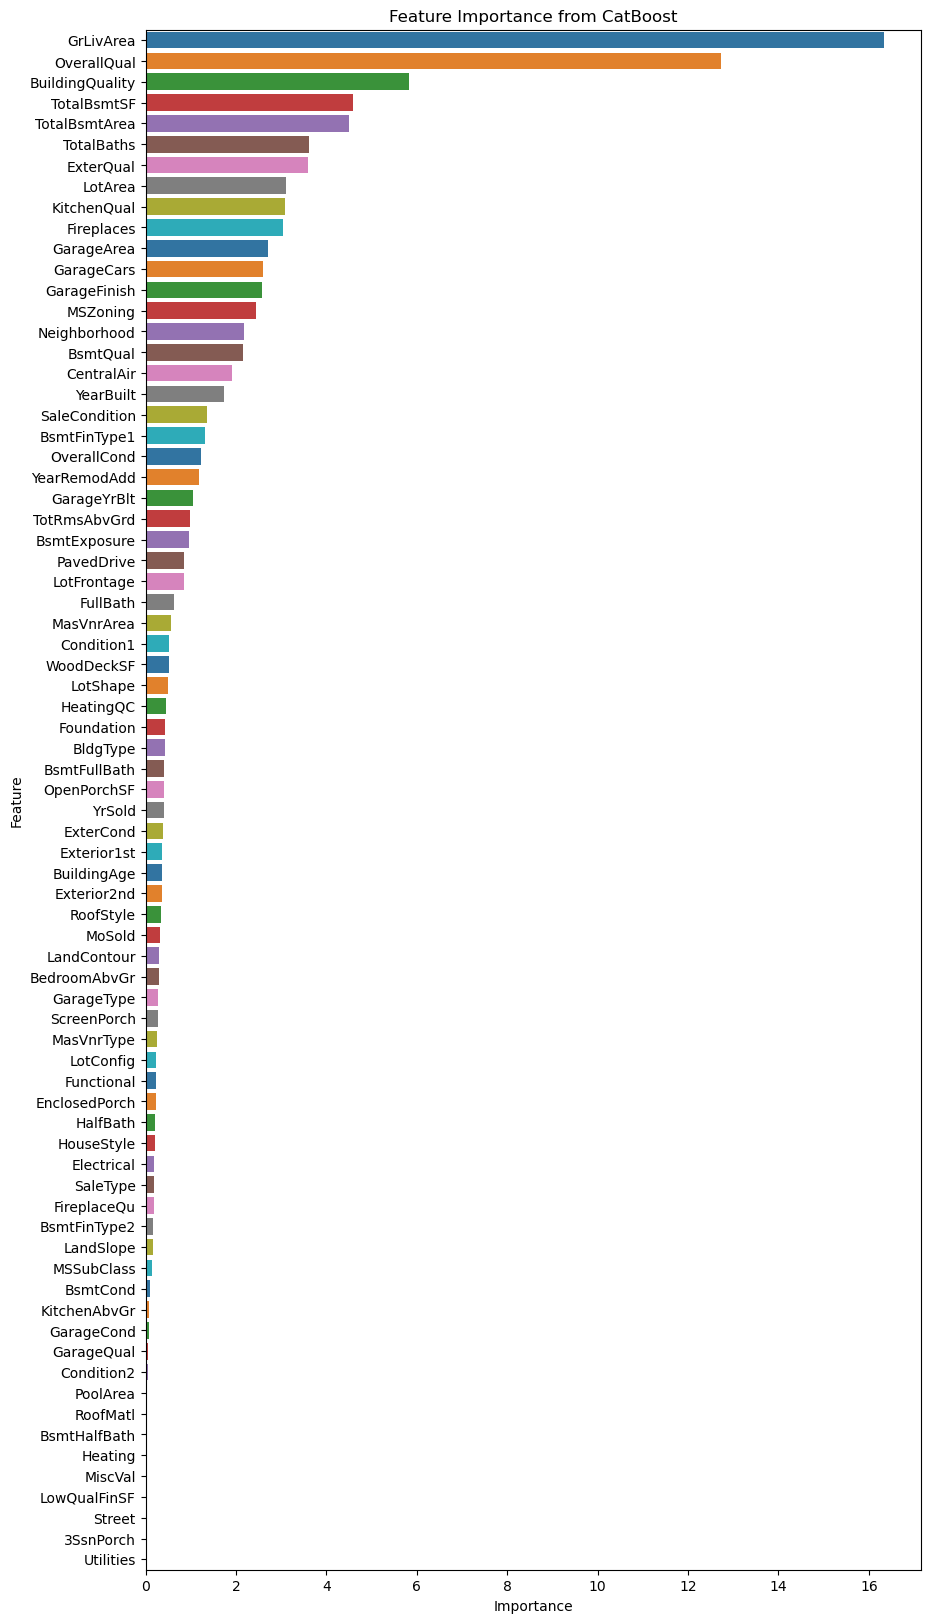

In [25]:
importances = model.get_feature_importance(train_pool)

importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 20))
sns.barplot(x='Importance', y='Feature', data=importance_df, hue = 'Feature', legend = False, palette='tab10')
plt.title('Feature Importance from CatBoost')
plt.show()

In [27]:
# cross-validation 실행 및 결과

from catboost import cv

cv_result = cv(pool = train_pool, params = {'loss_function':'RMSE'}, logging_level = 'Verbose', fold_count=5, iterations = 2000, plot="True")
cv_result

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]
0:	learn: 0.9915695	test: 0.9318363	best: 0.9318363 (0)	total: 29.9ms	remaining: 59.8s
1:	learn: 0.9726565	test: 0.9142269	best: 0.9142269 (1)	total: 60.3ms	remaining: 1m
2:	learn: 0.9535809	test: 0.8976463	best: 0.8976463 (2)	total: 98ms	remaining: 1m 5s
3:	learn: 0.9359265	test: 0.8817796	best: 0.8817796 (3)	total: 121ms	remaining: 1m
4:	learn: 0.9193698	test: 0.8663162	best: 0.8663162 (4)	total: 146ms	remaining: 58.4s
5:	learn: 0.9030640	test: 0.8522221	best: 0.8522221 (5)	total: 172ms	remaining: 57.3s
6:	learn: 0.8864592	test: 0.8372752	best: 0.8372752 (6)	total: 202ms	remaining: 57.5s
7:	learn: 0.8698646	test: 0.8219730	best: 0.8219730 (7)	total: 226ms	remaining: 56.2s
8:	learn: 0.8525527	test: 0.8065265	best: 0.8065265 (8)	total: 252ms	remaining: 55.8s
9:	learn: 0.8378764	test: 0.7942157	best: 0.7942157 (9)	total: 272ms	remaining: 54.1s
10:	learn: 0.8249619	test: 0.7827557	best: 0.7827557 (10)	total: 296ms	remaining: 53.5s
11:	learn: 0.8103021	test: 0.77014

,iterations,test-RMSE-mean,test-RMSE-std,train-RMSE-mean,train-RMSE-std
0,0,0.980139,0.041751,0.980395,0.009844
1,1,0.962293,0.042440,0.962172,0.008947
2,2,0.944666,0.042530,0.943908,0.008145
3,3,0.927370,0.042065,0.926375,0.008131
4,4,0.910138,0.041511,0.909033,0.008367
...,...,...,...,...,...
1995,1995,0.317866,0.056512,0.099313,0.004353
1996,1996,0.317857,0.056508,0.099279,0.004370
1997,1997,0.317860,0.056516,0.099263,0.004370
1998,1998,0.317859,0.056515,0.099187,0.004343


In [29]:
best_iteration = cv_result['test-RMSE-mean'].idxmin()  # RMSE가 가장 낮은 iteration 선택
print(f"최적 iteration: {best_iteration}")
print(f"최적 Test RMSE: {cv_result.loc[best_iteration, 'test-RMSE-mean']}")

최적 iteration: 1999
최적 Test RMSE: 0.31784114791306867


In [31]:
preds = model.predict(test_pool)
print(preds)

[-0.87149036 -0.07864023  0.25210465 ... -0.12658794 -0.77531952
  0.67727736]


In [33]:
# 아래는 예측값(preds) 역변환에 필요한 람다값 및 코드

# Yeo-Johnson 변환에 활용된 람다값
lambda_ = -0.044048042422657335

# 정규화에 활용된 SalePrice의 평균 및 표준편차
SalePrice_mean = 9.3309226951343
SalePrice_std = 0.23274601184129493

# 정규화를 먼저 역변환
preds = preds * SalePrice_std
preds = preds + SalePrice_mean

In [35]:
# Yeo-Johnson 변환을 역변환
# 역변환 함수 정의
def inverse_yeojohnson(y, lambda_):
    # y가 NumPy 배열인 경우를 대비
    y = np.asarray(y)

    # 각 요소에 대해 역변환 수행
    for i in range(len(y)):
        if y[i] >= 0 and lambda_ == 0:
            y[i] = exp(y[i]) - 1
        elif y[i] >= 0 and lambda_ != 0:
            y[i] = (y[i] * lambda_ + 1) ** (1 / lambda_) - 1
        elif y[i] < 0 and lambda_ != 2:
            y[i] = 1 - (-(2 - lambda_) * y[i] + 1) ** (1 / (2 - lambda_))
        elif y[i] < 0 and lambda_ == 2:
            y[i] = 1 - exp(-y[i])
    
    return y  # 수정된 결과 반환

# 예측값(preds)에 대해 역변환 수행
preds = inverse_yeojohnson(preds, lambda_)

In [37]:
output_df = pd.DataFrame({'Id': test_df.index,
                       'SalePrice': preds.squeeze()})

output_df.head()

,Id,SalePrice
0,1461,117668.498567
1,1462,160551.061923
2,1463,183004.010884
3,1464,194858.022109
4,1465,181244.245543


In [39]:
output_df.to_csv('output_cat2.csv', index=False)